In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Φόρτωση δεδομένων από το Keras (όπως ζητείται στο link της εκφώνησης)
# Το load_data() επιστρέφει 60.000 εικόνες για train και 10.000 για test
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# 2. Κανονικοποίηση (Normalization) στο [0, 1] όπως ζητείται στην παρ. 3 της σελ. 2
# Οι εικόνες είναι σε grayscale με τιμές 0-255. Διαιρούμε με το 255.
x_train_full = x_train_full.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. Διαχωρισμός σε Train και Validation (π.χ. κρατάμε το 15-20% για validation)
# Η εκφώνηση ζητάει ρητά τρία σύνολα: train, validation, test
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2, # 20% για validation
    random_state=42
)

# Εκτύπωση των διαστάσεων για επιβεβαίωση
print(f"Train shape: {x_train.shape}")      # Πρέπει να είναι (48000, 28, 28)
print(f"Validation shape: {x_val.shape}")   # Πρέπει να είναι (12000, 28, 28)
print(f"Test shape: {x_test.shape}")        # Πρέπει να είναι (10000, 28, 28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (48000, 28, 28)
Validation shape: (12000, 28, 28)
Test shape: (10000, 28, 28)


ΕΡΩΤΗΜΑ 3

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import time # Import the time module

# 1. Φόρτωση δεδομένων από το Keras (όπως ζητείται στο link της εκφώνησης)
# Το load_data() επιστρέφει 60.000 εικόνες για train και 10.000 για test
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# 2. Κανονικοποίηση (Normalization) στο [0, 1] όπως ζητείται στην παρ. 3 της σελ. 2
# Οι εικόνες είναι σε grayscale με τιμές 0-255. Διαιρούμε με το 255.
x_train_full = x_train_full.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. Διαχωρισμός σε Train και Validation (π.χ. κρατάμε το 15-20% για validation)
# Η εκφώνηση ζητάει ρητά τρία σύνολα: train, validation, test
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2, # 20% για validation
    random_state=42
)

# Flatten the input images
input_shape = x_train.shape[1:]
flattened_input_dim = input_shape[0] * input_shape[1] # 28 * 28 = 784

# Define the autoencoder architecture
# Encoder
input_img = layers.Input(shape=(flattened_input_dim,))
encoded = layers.Dense(256, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
latent_code = layers.Dense(32, activation='relu', name='latent_code')(encoded)

# Decoder
decoded = layers.Dense(128, activation='relu')(latent_code)
decoded = layers.Dense(256, activation='relu')(decoded)
output_img = layers.Dense(flattened_input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = models.Model(input_img, output_img, name='Deep_SAE')

# Encoder Model (for dimensionality reduction)
encoder = models.Model(input_img, latent_code, name='Encoder')

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Prepare data for autoencoder (flatten images)
x_train_flat = x_train.reshape((x_train.shape[0], flattened_input_dim))
x_val_flat = x_val.reshape((x_val.shape[0], flattened_input_dim))

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Training Deep Stacked Autoencoder...")
# Record start time
start_time = time.time()

# Train the autoencoder
history = autoencoder.fit(
    x_train_flat, x_train_flat, # Autoencoders train on input = output
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val_flat, x_val_flat),
    callbacks=[early_stopping],
    verbose=1
)

# Record end time
end_time = time.time()

print("Autoencoder training complete.")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Total training time: {end_time - start_time:.2f} seconds")

# Display model summaries
print("\nAutoencoder Model Summary:")
autoencoder.summary()
print("\nEncoder Model Summary:")
encoder.summary()

Training Deep Stacked Autoencoder...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0755 - val_loss: 0.0245
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0228 - val_loss: 0.0204
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0194 - val_loss: 0.0182
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0163 - val_loss: 0.0155
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0140 - val_loss: 0.0140
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0129 - val_loss:

Model: "Deep_SAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_code (Dense)             │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,430,162 (5.46 MB)

 Trainable params: 476,720 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 953,442 (3.64 MB)


Encoder Model Summary:


Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_code (Dense)             │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,984 (929.62 KB)

 Trainable params: 237,984 (929.62 KB)

 Non-trainable params: 0 (0.00 B)

ΕΡΩΤΗΜΑ 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


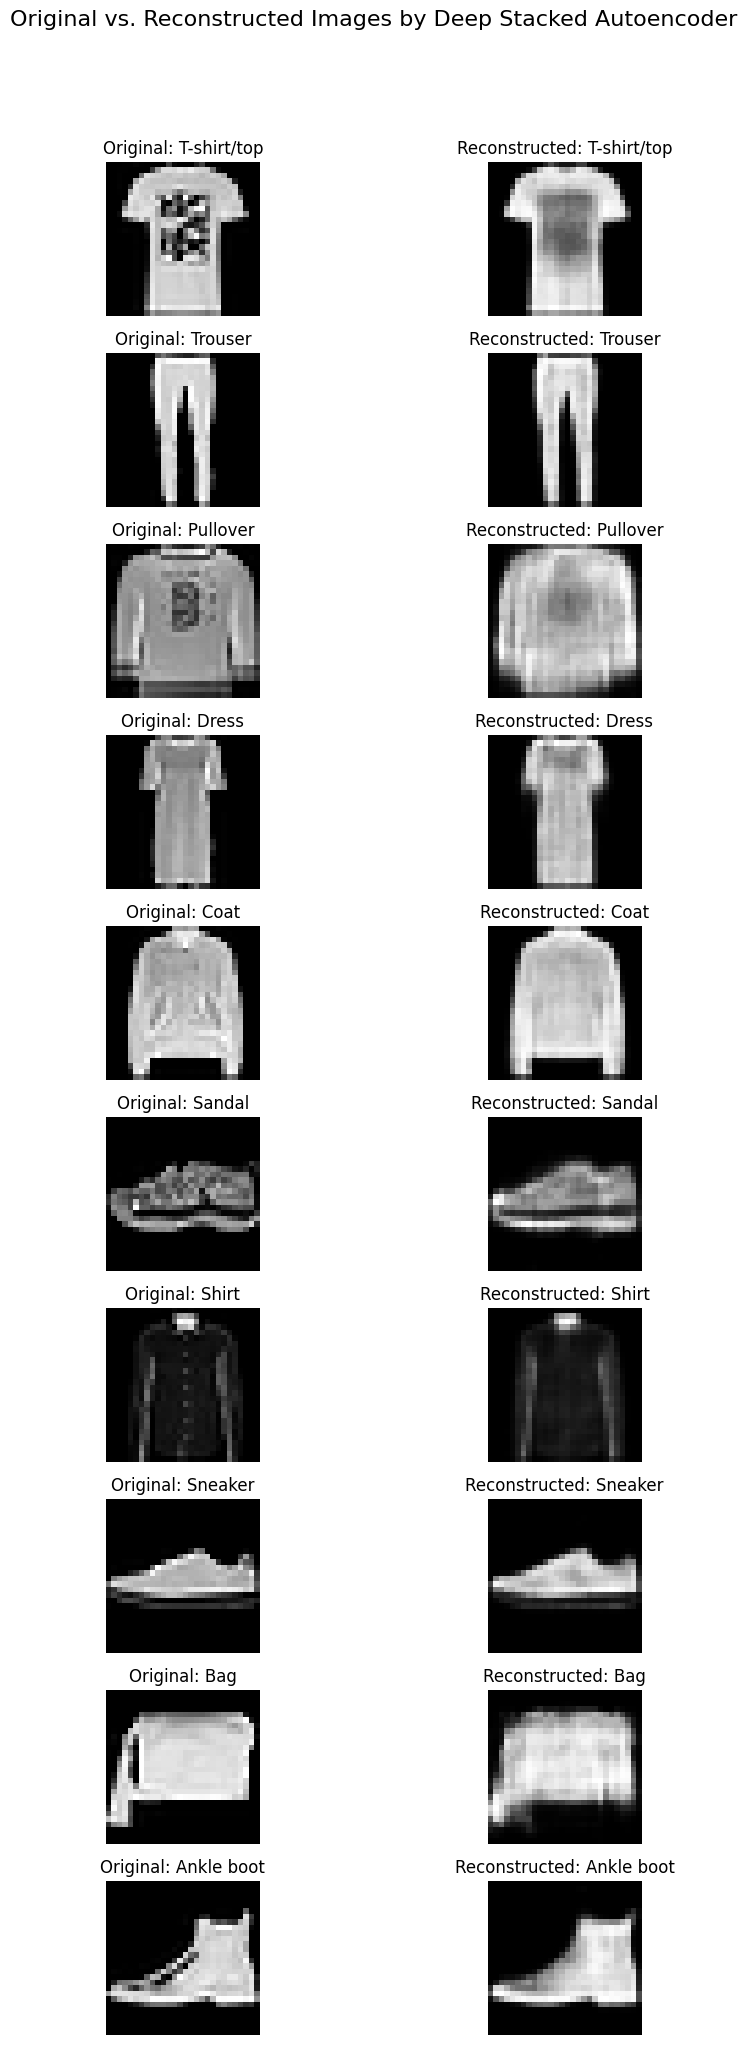

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for better readability in plots
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. Select one random image from each of the 10 classes in x_test
selected_original_images = []
selected_labels = []

for i in range(10): # Iterate through classes 0 to 9
    # Find indices for the current class in y_test
    class_indices = np.where(y_test == i)[0]
    # Randomly select one index from these indices
    random_index = np.random.choice(class_indices)
    # Get the original image and its label
    selected_original_images.append(x_test[random_index])
    selected_labels.append(y_test[random_index])

selected_original_images = np.array(selected_original_images) # Convert list to numpy array

# 2. Reconstruct these images using the trained autoencoder model

# First, flatten the selected original images to match the autoencoder's input shape (784 features)
selected_images_flat_for_ae = selected_original_images.reshape((selected_original_images.shape[0], flattened_input_dim))

# Use the autoencoder to predict (reconstruct) the flattened images
reconstructed_images_flat = autoencoder.predict(selected_images_flat_for_ae)

# Reshape the reconstructed flattened images back to their original 28x28 dimension for display
reconstructed_images = reconstructed_images_flat.reshape((reconstructed_images_flat.shape[0], 28, 28))

# 3. Display original versus reconstructed images for visual comparison
plt.figure(figsize=(10, 20)) # Set up the figure size for 10 rows and 2 columns

for i in range(10):
    # Plotting the original image
    plt.subplot(10, 2, 2 * i + 1) # Position for original image (left column)
    plt.imshow(selected_original_images[i], cmap='gray')
    plt.title(f"Original: {class_names[selected_labels[i]]}")
    plt.axis('off') # Hide axes for cleaner image display

    # Plotting the reconstructed image
    plt.subplot(10, 2, 2 * i + 2) # Position for reconstructed image (right column)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f"Reconstructed: {class_names[selected_labels[i]]}")
    plt.axis('off') # Hide axes for cleaner image display

plt.suptitle('Original vs. Reconstructed Images by Deep Stacked Autoencoder', y=1.02, fontsize=16) # Add a main title
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap, leaving space for suptitle
plt.show()


ΕΡΩΤΗΜΑ 5 ΔΙΑΓΡΑΜΜΑ VALIDATION LOSS

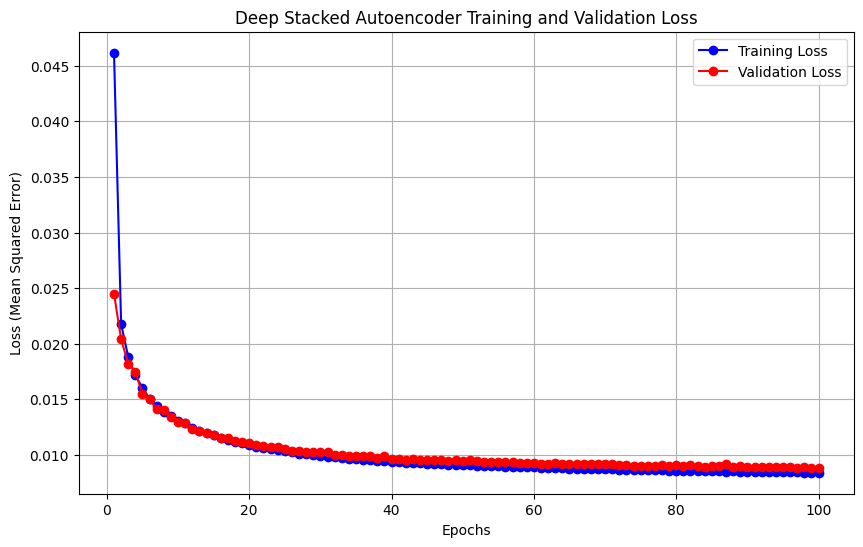

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Deep Stacked Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

(Οι παρακάτω κώδικες χρειάζονται για το ερώτημα 5 scatter plot)

In [ ]:
# Flatten x_test to match the encoder's input shape
X_test_flat = x_test.reshape((x_test.shape[0], flattened_input_dim))

# Use the trained encoder model to transform (encode) X_test_flat
X_test_encoded_SAE = encoder.predict(X_test_flat)

# Print the shape of X_test_encoded_SAE to confirm the dimension
print(f"Shape of X_test_encoded_SAE: {X_test_encoded_SAE.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of X_test_encoded_SAE: (10000, 32)


In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the encoded test data
X_test_pca = pca.fit_transform(X_test_encoded_SAE)

# Print the shape of the PCA-transformed data to verify
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_test_pca: (10000, 2)


In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the encoded test data
X_test_pca = pca.fit_transform(X_test_encoded_SAE)

# Print the shape of the PCA-transformed data to verify
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_test_pca: (10000, 2)


In [ ]:
from sklearn.decomposition import PCA

# Flatten x_test to match the encoder's input shape (re-added to ensure X_test_encoded_SAE is defined)
X_test_flat = x_test.reshape((x_test.shape[0], flattened_input_dim))

# Use the trained encoder model to transform (encode) X_test_flat (re-added to ensure X_test_encoded_SAE is defined)
X_test_encoded_SAE = encoder.predict(X_test_flat)

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA to the encoded test data
X_test_pca = pca.fit_transform(X_test_encoded_SAE)

# Print the shape of the PCA-transformed data to verify
print(f"Shape of X_test_pca: {X_test_pca.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of X_test_pca: (10000, 2)


ΕΡΩΤΗΜΑ 5 SCATTER PLOT

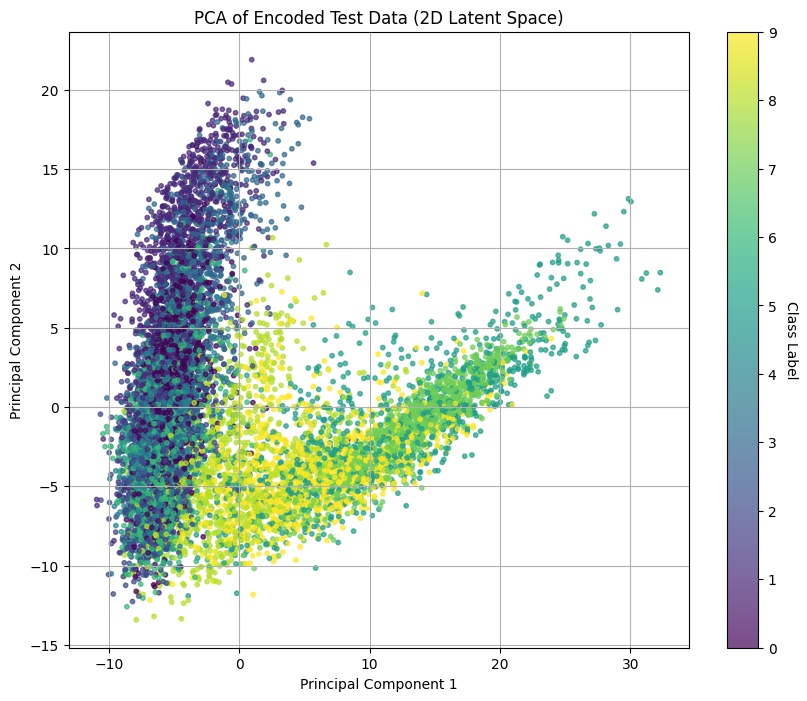

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', s=10, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Class Label', rotation=270, labelpad=15)

# Set plot title and labels
plt.title('PCA of Encoded Test Data (2D Latent Space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



ΕΡΩΤΗΜΑ 7 KMEANS CLUSTERING FOR RAW AND SAE DATA


In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np # Ensure numpy is imported for array operations
import time # Import the time module

# 1. Flatten x_test into X_test_flat (10000, 784)
# Ensure x_test and flattened_input_dim are available from previous cells
X_test_flat = x_test.reshape((x_test.shape[0], flattened_input_dim))

# Ensure X_test_encoded_SAE is available. If not, re-encode it.
# This part assumes 'encoder' model and 'flattened_input_dim' are defined from previous cells.
# If running this cell independently, uncomment and run the following lines:
# X_test_encoded_SAE = encoder.predict(X_test_flat)

# Initialize MiniBatchKMeans with n_clusters=10 and a random_state
# n_init='auto' is recommended for newer scikit-learn versions
mbkm = MiniBatchKMeans(n_clusters=10, random_state=42, n_init='auto')

# 3. Train the model once on Raw data (X_test_flat) and store labels
print("Training Minibatch KMeans on Raw Data...")
start_time_raw_mbkm = time.time()
mbkm.fit(X_test_flat)
end_time_raw_mbkm = time.time()
mbkm_labels_raw = mbkm.labels_
clustering_execution_time_raw = end_time_raw_mbkm - start_time_raw_mbkm

# 3. Train the model once on SAE data (X_test_encoded_SAE) and store labels
print("Training Minibatch KMeans on SAE Data...")
start_time_sae_mbkm = time.time()
mbkm.fit(X_test_encoded_SAE)
end_time_sae_mbkm = time.time()
mbkm_labels_sae = mbkm.labels_
clustering_execution_time_sae = end_time_sae_mbkm - start_time_sae_mbkm

# 4. Print the number of clusters (10) and the first 5 generated cluster labels
print("\n--- Clustering Results ---")
print(f"Number of clusters: {10}")

print("\nRaw Data Clustering:")
print(f"First 5 generated cluster labels (Raw Data): {mbkm_labels_raw[:5]}")
print(f"Execution time for MiniBatchKMeans on Raw Data: {clustering_execution_time_raw:.2f} seconds")

print("\nSAE Data Clustering:")
print(f"First 5 generated cluster labels (SAE Data): {mbkm_labels_sae[:5]}")
print(f"Execution time for MiniBatchKMeans on SAE Data: {clustering_execution_time_sae:.2f} seconds")

Training Minibatch KMeans on Raw Data...
Training Minibatch KMeans on SAE Data...

--- Clustering Results ---
Number of clusters: 10

Raw Data Clustering:
First 5 generated cluster labels (Raw Data): [3 2 5 5 0]
Execution time for MiniBatchKMeans on Raw Data: 0.72 seconds

SAE Data Clustering:
First 5 generated cluster labels (SAE Data): [1 2 7 7 4]
Execution time for MiniBatchKMeans on SAE Data: 0.05 seconds


ΕΡΩΤΗΜΑ 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score

print("\n--- Clustering Evaluation Metrics ---")

# --- Metrics for Raw Data ---
print("\nEvaluating Clustering on Raw Data (X_test_flat):")

# Calinski-Harabasz Index for Raw Data
ch_raw = calinski_harabasz_score(X_test_flat, mbkm_labels_raw)
print(f"Calinski-Harabasz Index (Raw): {ch_raw:.4f}")

# Davies-Bouldin Index for Raw Data
db_raw = davies_bouldin_score(X_test_flat, mbkm_labels_raw)
print(f"Davies-Bouldin Index (Raw): {db_raw:.4f}")

# Silhouette Score for Raw Data
sil_raw = silhouette_score(X_test_flat, mbkm_labels_raw)
print(f"Silhouette Score (Raw): {sil_raw:.4f}")

# Adjusted Rand Index for Raw Data (requires true labels y_test)
ari_raw = adjusted_rand_score(y_test, mbkm_labels_raw)
print(f"Adjusted Rand Index (Raw): {ari_raw:.4f}")

# --- Metrics for SAE Data ---
print("\nEvaluating Clustering on SAE Data (X_test_encoded_SAE):")

# Calinski-Harabasz Index for SAE Data
ch_sae = calinski_harabasz_score(X_test_encoded_SAE, mbkm_labels_sae)
print(f"Calinski-Harabasz Index (SAE): {ch_sae:.4f}")

# Davies-Bouldin Index for SAE Data
db_sae = davies_bouldin_score(X_test_encoded_SAE, mbkm_labels_sae)
print(f"Davies-Bouldin Index (SAE): {db_sae:.4f}")

# Silhouette Score for SAE Data
sil_sae = silhouette_score(X_test_encoded_SAE, mbkm_labels_sae)
print(f"Silhouette Score (SAE): {sil_sae:.4f}")

# Adjusted Rand Index for SAE Data (requires true labels y_test)
ari_sae = adjusted_rand_score(y_test, mbkm_labels_sae)
print(f"Adjusted Rand Index (SAE): {ari_sae:.4f}")


--- Clustering Evaluation Metrics ---

Evaluating Clustering on Raw Data (X_test_flat):
Calinski-Harabasz Index (Raw): 1174.9387
Davies-Bouldin Index (Raw): 2.0131
Silhouette Score (Raw): 0.1194
Adjusted Rand Index (Raw): 0.3529

Evaluating Clustering on SAE Data (X_test_encoded_SAE):
Calinski-Harabasz Index (SAE): 1716.8009
Davies-Bouldin Index (SAE): 1.9501
Silhouette Score (SAE): 0.1436
Adjusted Rand Index (SAE): 0.3002


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# Define missing variables
N_CLUSTERS = 10  # MiniBatchKMeans was initialized with 10 clusters
DIM_RED_TRAINING_TIME_SAE = 553.65  # From the autoencoder training output in cell BbGu4X5L2OES

# Prepare data for the DataFrame
data = [
    {
        'Dimensionality reduction technique name': 'Raw',
        'Clustering algorithm': 'MiniBatchKMeans',
        'Training time for the dim. red. tech. (s)': 0.0,
        'Execution time for the clustering tech. (s)': clustering_execution_time_raw,
        'Number of suggested clusters': N_CLUSTERS,
        'Calinski-Harabasz index': ch_raw,
        'Davies-Bouldin index': db_raw,
        'Silhouette score': sil_raw,
        'Adjusted Rand Index': ari_raw
    },
    {
        'Dimensionality reduction technique name': 'Stacked Autoencoder (SAE)',
        'Clustering algorithm': 'MiniBatchKMeans',
        'Training time for the dim. red. tech. (s)': DIM_RED_TRAINING_TIME_SAE,
        'Execution time for the clustering tech. (s)': clustering_execution_time_sae,
        'Number of suggested clusters': N_CLUSTERS,
        'Calinski-Harabasz index': ch_sae,
        'Davies-Bouldin index': db_sae,
        'Silhouette score': sil_sae,
        'Adjusted Rand Index': ari_sae
    }
]

# Create the DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame with formatting
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

print("Evaluation Results DataFrame:")
display(results_df)

# Reset float format to default
pd.options.display.float_format = None

Evaluation Results DataFrame:


,Dimensionality reduction technique name,Clustering algorithm,Training time for the dim. red. tech. (s),Execution time for the clustering tech. (s),Number of suggested clusters,Calinski-Harabasz index,Davies-Bouldin index,Silhouette score,Adjusted Rand Index
0,Raw,MiniBatchKMeans,0.0000,0.7216,10,1174.9387,2.0131,0.1194,0.3529
1,Stacked Autoencoder (SAE),MiniBatchKMeans,553.6500,0.0475,10,1716.8009,1.9501,0.1436,0.3002


ΕΡΩΤΗΜΑ 10

Generating Visualization for Raw Data Clusters...


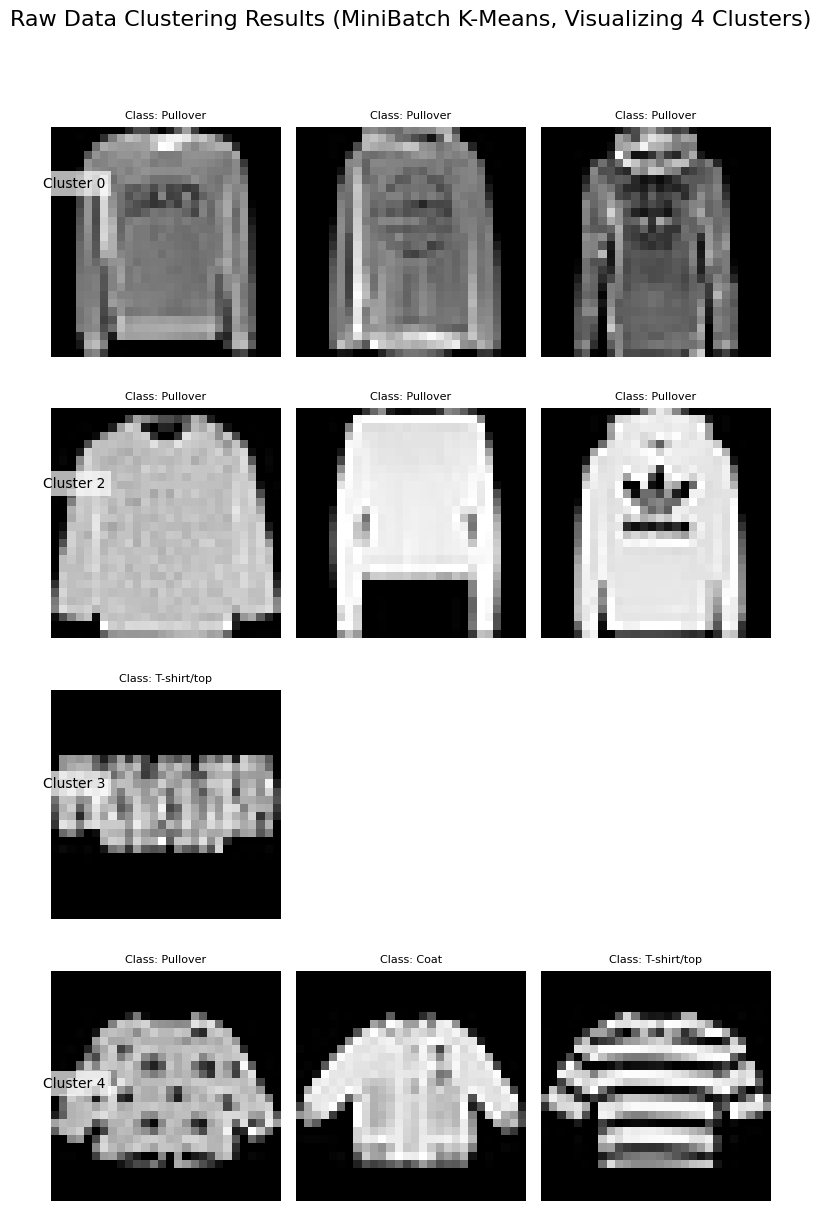


Generating Visualization for SAE Data Clusters...


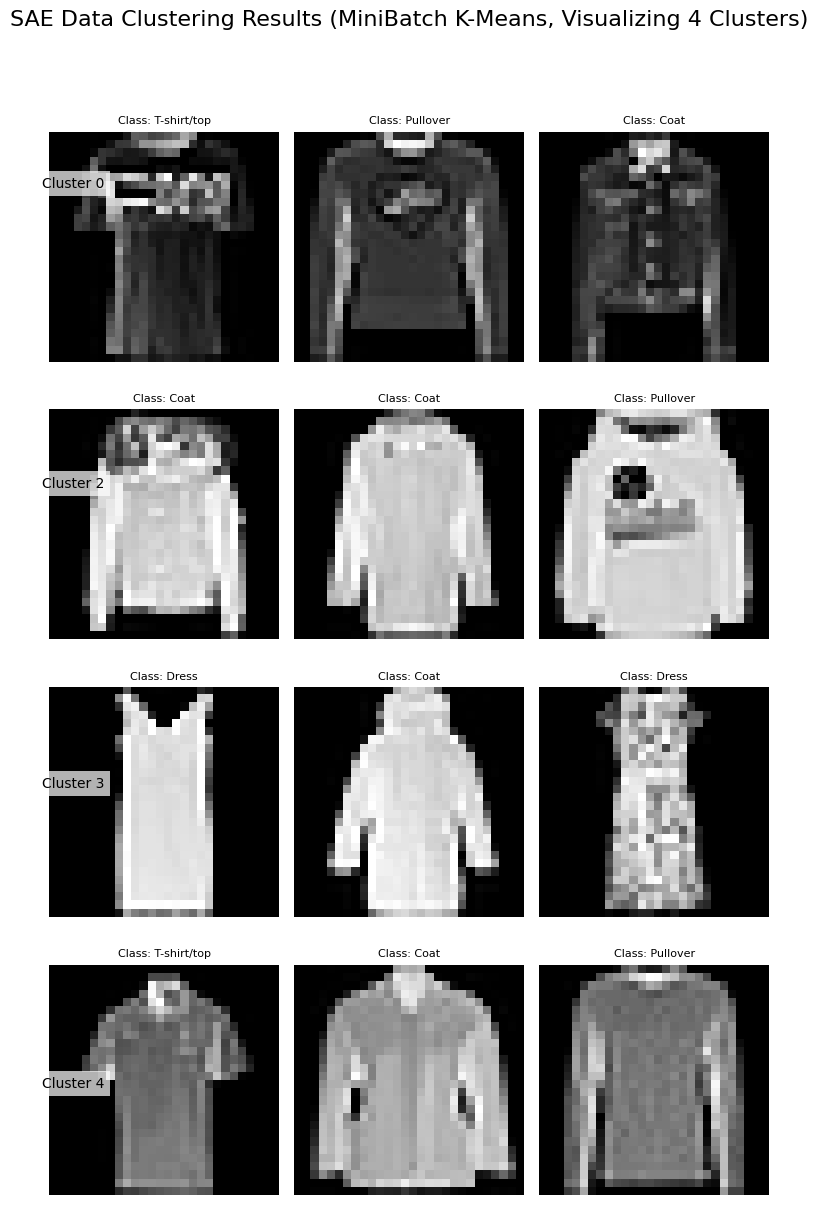

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for better readability in plots
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# User specified classes to focus on for visualization
selected_classes = [0, 2, 3, 4]

num_images_per_cluster = 3

# --- Visualization 1: Raw Data Clusters (MiniBatch K-Means) ---
print("Generating Visualization for Raw Data Clusters...")
clusters_to_visualize_raw = [0, 2, 3, 4] # Updated as per user request

plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_raw) * 3))

for i, cluster_id in enumerate(clusters_to_visualize_raw):
    # Find indices of images assigned to this cluster in raw data
    indices_in_cluster = np.where(mbkm_labels_raw == cluster_id)[0]

    # Filter these indices further to include only images from the selected_classes
    # The 'y_test' array contains the true labels for the test images
    filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test[idx] in selected_classes]

    if len(filtered_indices_by_true_class) == 0:
        print(f"Warning: Cluster {cluster_id} (Raw Data) has no images from selected_classes. Skipping visualization.")
        # Add a placeholder subplot to maintain grid structure and prevent empty space issues
        for j in range(num_images_per_cluster):
            ax = plt.subplot(len(clusters_to_visualize_raw), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            ax.text(0.5, 0.5, 'No images from selected classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.axis('off')
        continue

    selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

    for j, img_idx in enumerate(selected_indices):
        ax = plt.subplot(len(clusters_to_visualize_raw), num_images_per_cluster, i * num_images_per_cluster + j + 1)
        plt.imshow(x_test[img_idx], cmap='gray')
        plt.axis('off')
        if 'class_names' in globals() and 'y_test' in globals():
            ax.set_title(f"Class: {class_names[y_test[img_idx]]}", fontsize=8)

    # Add a title for the entire row (cluster) slightly above the row
    # Using plt.text with coordinates relative to the figure
    fig_width = plt.gcf().get_size_inches()[0]
    fig_height = plt.gcf().get_size_inches()[1]
    text_x = 0.01 * (1.0 / (num_images_per_cluster * 2.5 / fig_width)) # Adjust x-position relative to subplot row
    text_y = 1 - (i * 1.0 / len(clusters_to_visualize_raw) + 0.5 / len(clusters_to_visualize_raw))
    plt.figtext(0.01, text_y, f'Cluster {cluster_id}', horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.suptitle(f'Raw Data Clustering Results (MiniBatch K-Means, Visualizing {len(clusters_to_visualize_raw)} Clusters)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap, leaving space for suptitle
plt.show()


# --- Visualization 2: SAE Data Clusters (MiniBatch K-Means) ---
print("\nGenerating Visualization for SAE Data Clusters...")
clusters_to_visualize_sae = [0, 2, 3, 4] # Updated as per user request

plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_sae) * 3))

for i, cluster_id in enumerate(clusters_to_visualize_sae):
    # Find indices of images assigned to this cluster in SAE data
    indices_in_cluster = np.where(mbkm_labels_sae == cluster_id)[0]

    # Filter these indices further to include only images from the selected_classes
    filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test[idx] in selected_classes]

    if len(filtered_indices_by_true_class) == 0:
        print(f"Warning: Cluster {cluster_id} (SAE Data) has no images from selected_classes. Skipping visualization.")
        # Add a placeholder subplot to maintain grid structure and prevent empty space issues
        for j in range(num_images_per_cluster):
            ax = plt.subplot(len(clusters_to_visualize_sae), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            ax.text(0.5, 0.5, 'No images from selected classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.axis('off')
        continue

    selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

    for j, img_idx in enumerate(selected_indices):
        ax = plt.subplot(len(clusters_to_visualize_sae), num_images_per_cluster, i * num_images_per_cluster + j + 1)
        plt.imshow(x_test[img_idx], cmap='gray')
        plt.axis('off')
        if 'class_names' in globals() and 'y_test' in globals():
            ax.set_title(f"Class: {class_names[y_test[img_idx]]}", fontsize=8)

    # Add a title for the entire row (cluster) slightly above the row
    fig_width = plt.gcf().get_size_inches()[0]
    fig_height = plt.gcf().get_size_inches()[1]
    text_x = 0.01 * (1.0 / (num_images_per_cluster * 2.5 / fig_width))
    text_y = 1 - (i * 1.0 / len(clusters_to_visualize_sae) + 0.5 / len(clusters_to_visualize_sae))
    plt.figtext(0.01, text_y, f'Cluster {cluster_id}', horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.suptitle(f'SAE Data Clustering Results (MiniBatch K-Means, Visualizing {len(clusters_to_visualize_sae)} Clusters)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap, leaving space for suptitle
plt.show()

ΕΡΩΤΗΜΑ 7 CLUSTERING METHOD( DBSCAN )

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import time # Import time for measuring execution

print("\n--- DBSCAN Clustering ---\n")

# 1. Initialize DBSCAN for Raw Data
dbscan_raw = DBSCAN(eps=5.0, min_samples=5)

# Fit on X_test_flat and store labels
print("Clustering on Raw Data (X_test_flat) with DBSCAN...")
start_time_raw = time.time()
dbscan_labels_raw = dbscan_raw.fit_predict(X_test_flat)
end_time_raw = time.time()
clustering_execution_time_raw = end_time_raw - start_time_raw

# Verification for Raw Data
unique_labels_raw, counts_raw = np.unique(dbscan_labels_raw, return_counts=True)
n_clusters_raw = 0
n_noise_points_raw = 0
if -1 in unique_labels_raw:
    noise_index_raw = np.where(unique_labels_raw == -1)[0][0]
    n_noise_points_raw = counts_raw[noise_index_raw]
    n_clusters_raw = len(unique_labels_raw) - 1 # Exclude noise point from cluster count
else:
    n_clusters_raw = len(unique_labels_raw)

print(f"Number of clusters found (Raw Data): {n_clusters_raw}")
print(f"Number of noise points (Raw Data): {n_noise_points_raw}")
print(f"First 20 generated cluster labels (Raw Data): {dbscan_labels_raw[:20]}")
print(f"Execution time for DBSCAN on Raw Data: {clustering_execution_time_raw:.2f} seconds")


# 2. Initialize DBSCAN for SAE Data
dbscan_sae = DBSCAN(eps=3.0, min_samples=5)

# Fit on X_test_encoded_SAE and store labels
print("\nClustering on SAE Data (X_test_encoded_SAE) with DBSCAN...")
start_time_sae = time.time()
dbscan_labels_sae = dbscan_sae.fit_predict(X_test_encoded_SAE)
end_time_sae = time.time()
clustering_execution_time_sae = end_time_sae - start_time_sae

# Verification for SAE Data
unique_labels_sae, counts_sae = np.unique(dbscan_labels_sae, return_counts=True)
n_clusters_sae = 0
n_noise_points_sae = 0
if -1 in unique_labels_sae:
    noise_index_sae = np.where(unique_labels_sae == -1)[0][0]
    n_noise_points_sae = counts_sae[noise_index_sae]
    n_clusters_sae = len(unique_labels_sae) - 1 # Exclude noise point from cluster count
else:
    n_clusters_sae = len(unique_labels_sae)

print(f"Number of clusters found (SAE Data): {n_clusters_sae}")
print(f"Number of noise points (SAE Data): {n_noise_points_sae}")
print(f"First 20 generated cluster labels (SAE Data): {dbscan_labels_sae[:20]}")
print(f"Execution time for DBSCAN on SAE Data: {clustering_execution_time_sae:.2f} seconds")


--- DBSCAN Clustering ---

Clustering on Raw Data (X_test_flat) with DBSCAN...
Number of clusters found (Raw Data): 7
Number of noise points (Raw Data): 2249
First 20 generated cluster labels (Raw Data): [ 0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0 -1  0  0]
Execution time for DBSCAN on Raw Data: 7.57 seconds

Clustering on SAE Data (X_test_encoded_SAE) with DBSCAN...
Number of clusters found (SAE Data): 26
Number of noise points (SAE Data): 9501
First 20 generated cluster labels (SAE Data): [-1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Execution time for DBSCAN on SAE Data: 0.46 seconds


ΕΡΩΤΗΜΑ 8

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

print("\n--- DBSCAN Clustering Evaluation Metrics ---")

# --- Evaluation for Raw Data ---
print("\nEvaluating DBSCAN Clustering on Raw Data (X_test_flat):")

# Filter out noise points for internal metrics
non_noise_mask_raw = (dbscan_labels_raw != -1)
X_test_flat_filtered = X_test_flat[non_noise_mask_raw]
dbscan_labels_raw_filtered = dbscan_labels_raw[non_noise_mask_raw]
unique_filtered_labels_raw = np.unique(dbscan_labels_raw_filtered)

# Initialize metrics with NaN to handle edge cases
ch_dbscan_raw, db_dbscan_raw, sil_dbscan_raw = np.nan, np.nan, np.nan

# Check conditions for internal metrics
if len(unique_filtered_labels_raw) >= 2 and len(X_test_flat_filtered) >= 2:
    ch_dbscan_raw = calinski_harabasz_score(X_test_flat_filtered, dbscan_labels_raw_filtered)
    db_dbscan_raw = davies_bouldin_score(X_test_flat_filtered, dbscan_labels_raw_filtered)

    # Silhouette score also needs more than one cluster and samples
    if len(X_test_flat_filtered) > 1:
        sil_dbscan_raw = silhouette_score(X_test_flat_filtered, dbscan_labels_raw_filtered)
    else:
        print("Warning (Raw): Not enough samples (<=1) after noise removal for Silhouette Score.")
else:
    print("Warning (Raw): Not enough non-noise clusters (<2) or samples (<2) to compute Calinski-Harabasz, Davies-Bouldin, and Silhouette Scores.")

print(f"Calinski-Harabasz Index (Raw): {ch_dbscan_raw:.4f}")
print(f"Davies-Bouldin Index (Raw): {db_dbscan_raw:.4f}")
print(f"Silhouette Score (Raw): {sil_dbscan_raw:.4f}")

# Adjusted Rand Index (ARI) - uses all points and y_test
ari_dbscan_raw = adjusted_rand_score(y_test, dbscan_labels_raw)
print(f"Adjusted Rand Index (Raw): {ari_dbscan_raw:.4f}")

# --- Evaluation for SAE Data ---
print("\nEvaluating DBSCAN Clustering on SAE Data (X_test_encoded_SAE):")

# Filter out noise points for internal metrics
non_noise_mask_sae = (dbscan_labels_sae != -1)
X_test_encoded_SAE_filtered = X_test_encoded_SAE[non_noise_mask_sae]
dbscan_labels_sae_filtered = dbscan_labels_sae[non_noise_mask_sae]
unique_filtered_labels_sae = np.unique(dbscan_labels_sae_filtered)

# Initialize metrics with NaN to handle edge cases
ch_dbscan_sae, db_dbscan_sae, sil_dbscan_sae = np.nan, np.nan, np.nan

# Check conditions for internal metrics
if len(unique_filtered_labels_sae) >= 2 and len(X_test_encoded_SAE_filtered) >= 2:
    ch_dbscan_sae = calinski_harabasz_score(X_test_encoded_SAE_filtered, dbscan_labels_sae_filtered)
    db_dbscan_sae = davies_bouldin_score(X_test_encoded_SAE_filtered, dbscan_labels_sae_filtered)

    # Silhouette score also needs more than one cluster and samples
    if len(X_test_encoded_SAE_filtered) > 1:
        sil_dbscan_sae = silhouette_score(X_test_encoded_SAE_filtered, dbscan_labels_sae_filtered)
    else:
        print("Warning (SAE): Not enough samples (<=1) after noise removal for Silhouette Score.")
else:
    print("Warning (SAE): Not enough non-noise clusters (<2) or samples (<2) to compute Calinski-Harabasz, Davies-Bouldin, and Silhouette Scores.")

print(f"Calinski-Harabasz Index (SAE): {ch_dbscan_sae:.4f}")
print(f"Davies-Bouldin Index (SAE): {db_dbscan_sae:.4f}")
print(f"Silhouette Score (SAE): {sil_dbscan_sae:.4f}")

# Adjusted Rand Index (ARI) - uses all points and y_test
ari_dbscan_sae = adjusted_rand_score(y_test, dbscan_labels_sae)
print(f"Adjusted Rand Index (SAE): {ari_dbscan_sae:.4f}")


--- DBSCAN Clustering Evaluation Metrics ---

Evaluating DBSCAN Clustering on Raw Data (X_test_flat):
Calinski-Harabasz Index (Raw): 16.1305
Davies-Bouldin Index (Raw): 1.4402
Silhouette Score (Raw): -0.0964
Adjusted Rand Index (Raw): 0.0242

Evaluating DBSCAN Clustering on SAE Data (X_test_encoded_SAE):
Calinski-Harabasz Index (SAE): 64.6038
Davies-Bouldin Index (SAE): 1.2056
Silhouette Score (SAE): 0.0255
Adjusted Rand Index (SAE): 0.0016


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# Create new data entries for DBSCAN
data_dbscan = [
    {
        'Dimensionality reduction technique name': 'Raw',
        'Clustering algorithm': 'DBSCAN',
        'Training time for the dim. red. tech. (s)': 0.0,
        'Execution time for the clustering tech. (s)': clustering_execution_time_raw,
        'Number of suggested clusters': n_clusters_raw,
        'Calinski-Harabasz index': ch_dbscan_raw,
        'Davies-Bouldin index': db_dbscan_raw,
        'Silhouette score': sil_dbscan_raw,
        'Adjusted Rand Index': ari_dbscan_raw
    },
    {
        'Dimensionality reduction technique name': 'Stacked Autoencoder (SAE)',
        'Clustering algorithm': 'DBSCAN',
        'Training time for the dim. red. tech. (s)': DIM_RED_TRAINING_TIME_SAE, # Use the SAE training time
        'Execution time for the clustering tech. (s)': clustering_execution_time_sae,
        'Number of suggested clusters': n_clusters_sae,
        'Calinski-Harabasz index': ch_dbscan_sae,
        'Davies-Bouldin index': db_dbscan_sae,
        'Silhouette score': sil_dbscan_sae,
        'Adjusted Rand Index': ari_dbscan_sae
    }
]

# Create a DataFrame for the new DBSCAN entries
dbscan_df = pd.DataFrame(data_dbscan)

# Reconstruct results_df from scratch to avoid cumulative duplicates
# Start with MiniBatchKMeans data (data list from previous cell)
mbkm_df = pd.DataFrame(data)

# Concatenate MiniBatchKMeans and DBSCAN DataFrames
results_df = pd.concat([mbkm_df, dbscan_df], ignore_index=True)

# Ensure unique rows (though reconstructing should largely prevent this if done correctly)
results_df.drop_duplicates(inplace=True, ignore_index=True)

# Display the updated DataFrame with formatting
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

print("Updated Evaluation Results DataFrame (Duplicates Removed):")
display(results_df)

# Reset float format to default
pd.options.display.float_format = None

Updated Evaluation Results DataFrame (Duplicates Removed):


,Dimensionality reduction technique name,Clustering algorithm,Training time for the dim. red. tech. (s),Execution time for the clustering tech. (s),Number of suggested clusters,Calinski-Harabasz index,Davies-Bouldin index,Silhouette score,Adjusted Rand Index
0,Raw,MiniBatchKMeans,0.0000,0.7216,10,1174.9387,2.0131,0.1194,0.3529
1,Stacked Autoencoder (SAE),MiniBatchKMeans,553.6500,0.0475,10,1716.8009,1.9501,0.1436,0.3002
2,Raw,DBSCAN,0.0000,7.5698,7,16.1305,1.4402,-0.0964,0.0242
3,Stacked Autoencoder (SAE),DBSCAN,553.6500,0.4627,26,64.6038,1.2056,0.0255,0.0016


ΕΡΩΤΗΜΑ 10

Generating Visualization for Raw Data DBSCAN Clusters...


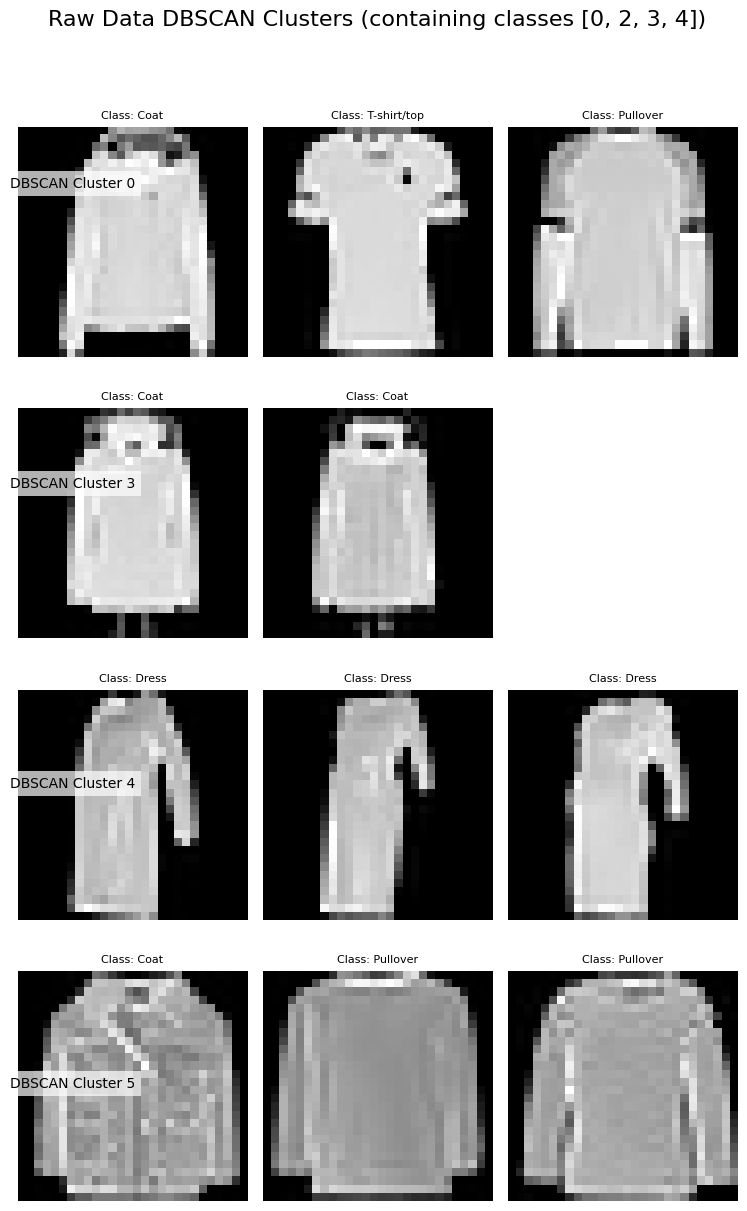


Generating Visualization for SAE Data DBSCAN Clusters...


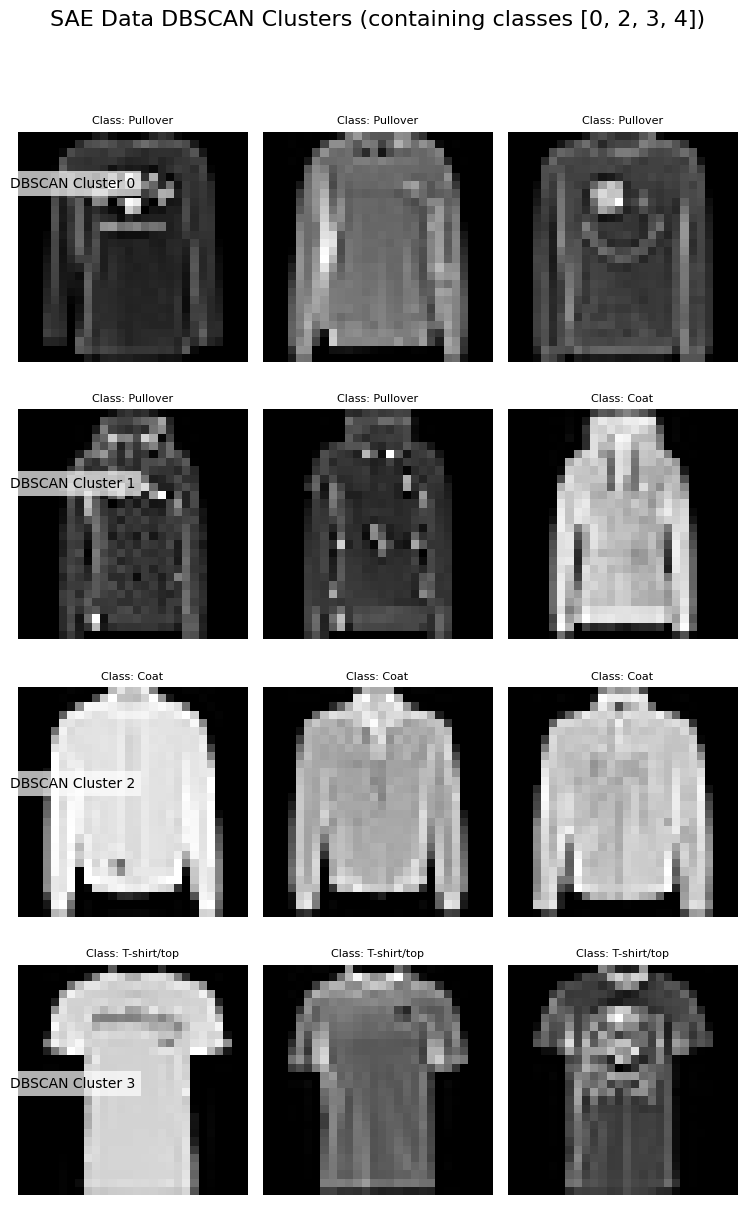

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for better readability in plots
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_images_per_cluster = 3

# Define the specific true classes the user wants to visualize
target_true_classes = [0, 2, 3, 4]

# --- Visualization 1: Raw Data DBSCAN Clusters (Ignoring Noise) ---
print("Generating Visualization for Raw Data DBSCAN Clusters...")

# Filter out noise points initially to work only with clustered data
non_noise_mask_raw_dbscan = (dbscan_labels_raw != -1)
x_test_raw_filtered_all = x_test[non_noise_mask_raw_dbscan]
y_test_raw_filtered_all = y_test[non_noise_mask_raw_dbscan]
dbscan_labels_raw_filtered_all = dbscan_labels_raw[non_noise_mask_raw_dbscan]

# Find DBSCAN clusters that contain images from the target_true_classes
relevant_dbscan_clusters_raw = set()
for true_class_id in target_true_classes:
    # Find indices in the filtered data where true label matches target_true_class
    indices_of_true_class = np.where(y_test_raw_filtered_all == true_class_id)[0]
    # Add the DBSCAN labels corresponding to these indices to the set of relevant clusters
    relevant_dbscan_clusters_raw.update(dbscan_labels_raw_filtered_all[indices_of_true_class])

# Convert to list and sort for consistent visualization
clusters_to_visualize_raw_dbscan = sorted(list(relevant_dbscan_clusters_raw))
# Limit to a reasonable number of clusters to display, e.g., first 4 or 5
clusters_to_visualize_raw_dbscan = clusters_to_visualize_raw_dbscan[:min(len(clusters_to_visualize_raw_dbscan), 4)]


if len(clusters_to_visualize_raw_dbscan) > 0:
    plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_raw_dbscan) * 3))

    for i, cluster_id in enumerate(clusters_to_visualize_raw_dbscan):
        # Find indices of images assigned to this cluster in the FILTERED RAW data
        indices_in_cluster = np.where(dbscan_labels_raw_filtered_all == cluster_id)[0]

        # Filter these indices further to include only images from the target_true_classes
        filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test_raw_filtered_all[idx] in target_true_classes]

        if len(filtered_indices_by_true_class) == 0:
            print(f"Warning: DBSCAN Cluster {cluster_id} (Raw Data) has no images from specified true classes {target_true_classes}. Skipping visualization for this cluster.")
            # Add a placeholder subplot to maintain grid structure
            for j in range(num_images_per_cluster):
                ax = plt.subplot(len(clusters_to_visualize_raw_dbscan), num_images_per_cluster, i * num_images_per_cluster + j + 1)
                ax.text(0.5, 0.5, 'No images from specified classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                ax.axis('off')
            continue

        selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

        for j, img_idx in enumerate(selected_indices):
            ax = plt.subplot(len(clusters_to_visualize_raw_dbscan), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            plt.imshow(x_test_raw_filtered_all[img_idx], cmap='gray')
            plt.axis('off')
            ax.set_title(f"Class: {class_names[y_test_raw_filtered_all[img_idx]]}", fontsize=8)

        # Add a title for the entire row (cluster)
        plt.figtext(0.01, 1 - (i * 1.0 / len(clusters_to_visualize_raw_dbscan) + 0.5 / len(clusters_to_visualize_raw_dbscan)), f'DBSCAN Cluster {cluster_id}',
                    horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.suptitle(f'Raw Data DBSCAN Clusters (containing classes {target_true_classes})', y=1.02, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
else:
    print(f"No DBSCAN clusters found in Raw Data containing images from true classes {target_true_classes} after filtering noise.")


# --- Visualization 2: SAE Data DBSCAN Clusters (Ignoring Noise) ---
print("\nGenerating Visualization for SAE Data DBSCAN Clusters...")

# Filter out noise points initially
non_noise_mask_sae_dbscan = (dbscan_labels_sae != -1)
x_test_sae_filtered_all = x_test[non_noise_mask_sae_dbscan]
y_test_sae_filtered_all = y_test[non_noise_mask_sae_dbscan]
dbscan_labels_sae_filtered_all = dbscan_labels_sae[non_noise_mask_sae_dbscan]

# Find DBSCAN clusters that contain images from the target_true_classes
relevant_dbscan_clusters_sae = set()
for true_class_id in target_true_classes:
    # Find indices in the filtered data where true label matches target_true_class
    indices_of_true_class = np.where(y_test_sae_filtered_all == true_class_id)[0]
    # Add the DBSCAN labels corresponding to these indices to the set of relevant clusters
    relevant_dbscan_clusters_sae.update(dbscan_labels_sae_filtered_all[indices_of_true_class])

# Convert to list and sort for consistent visualization
clusters_to_visualize_sae_dbscan = sorted(list(relevant_dbscan_clusters_sae))
# Limit to a reasonable number of clusters to display, e.g., first 4 or 5
clusters_to_visualize_sae_dbscan = clusters_to_visualize_sae_dbscan[:min(len(clusters_to_visualize_sae_dbscan), 4)]


if len(clusters_to_visualize_sae_dbscan) > 0:
    plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_sae_dbscan) * 3))

    for i, cluster_id in enumerate(clusters_to_visualize_sae_dbscan):
        # Find indices of images assigned to this cluster in the FILTERED SAE data
        indices_in_cluster = np.where(dbscan_labels_sae_filtered_all == cluster_id)[0]

        # Filter these indices further to include only images from the target_true_classes
        filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test_sae_filtered_all[idx] in target_true_classes]

        if len(filtered_indices_by_true_class) == 0:
            print(f"Warning: DBSCAN Cluster {cluster_id} (SAE Data) has no images from specified true classes {target_true_classes}. Skipping visualization for this cluster.")
            # Add a placeholder subplot to maintain grid structure
            for j in range(num_images_per_cluster):
                ax = plt.subplot(len(clusters_to_visualize_sae_dbscan), num_images_per_cluster, i * num_images_per_cluster + j + 1)
                ax.text(0.5, 0.5, 'No images from specified classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                ax.axis('off')
            continue

        selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

        for j, img_idx in enumerate(selected_indices):
            ax = plt.subplot(len(clusters_to_visualize_sae_dbscan), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            plt.imshow(x_test_sae_filtered_all[img_idx], cmap='gray')
            plt.axis('off')
            ax.set_title(f"Class: {class_names[y_test_sae_filtered_all[img_idx]]}", fontsize=8)

        # Add a title for the entire row (cluster)
        plt.figtext(0.01, 1 - (i * 1.0 / len(clusters_to_visualize_sae_dbscan) + 0.5 / len(clusters_to_visualize_sae_dbscan)), f'DBSCAN Cluster {cluster_id}',
                    horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.suptitle(f'SAE Data DBSCAN Clusters (containing classes {target_true_classes})', y=1.02, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
else:
    print(f"No DBSCAN clusters found in SAE Data containing images from true classes {target_true_classes} after filtering noise.")

ΕΡΩΤΗΜΑ 7 AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

print("\n--- Agglomerative Clustering ---\n")

# Re-defining X_test_flat and X_test_encoded_SAE to ensure they are available
# This assumes x_test, flattened_input_dim, and the 'encoder' model are available from previous cells.
X_test_flat = x_test.reshape((x_test.shape[0], flattened_input_dim))
X_test_encoded_SAE = encoder.predict(X_test_flat)

# 1. Agglomerative Clustering on Raw Data (X_test_flat)
print("Clustering on Raw Data (X_test_flat) with AgglomerativeClustering...")
start_time_raw_agg = time.time()
agg_clustering_raw = AgglomerativeClustering(n_clusters=10)
agg_labels_raw = agg_clustering_raw.fit_predict(X_test_flat)
end_time_raw_agg = time.time()
clustering_execution_time_raw_agg = end_time_raw_agg - start_time_raw_agg

print("Raw Data Agglomerative Clustering:")
print(f"Number of clusters found (Raw Data): {len(np.unique(agg_labels_raw))}")
print(f"First 5 generated cluster labels (Raw Data): {agg_labels_raw[:5]}")
print(f"Execution time for AgglomerativeClustering on Raw Data: {clustering_execution_time_raw_agg:.2f} seconds")

# 2. Agglomerative Clustering on SAE Data (X_test_encoded_SAE)
print("\nClustering on SAE Data (X_test_encoded_SAE) with AgglomerativeClustering...")
start_time_sae_agg = time.time()
agg_clustering_sae = AgglomerativeClustering(n_clusters=10)
agg_labels_sae = agg_clustering_sae.fit_predict(X_test_encoded_SAE)
end_time_sae_agg = time.time()
clustering_execution_time_sae_agg = end_time_sae_agg - start_time_sae_agg

print("SAE Data Agglomerative Clustering:")
print(f"Number of clusters found (SAE Data): {len(np.unique(agg_labels_sae))}")
print(f"First 5 generated cluster labels (SAE Data): {agg_labels_sae[:5]}")
print(f"Execution time for AgglomerativeClustering on SAE Data: {clustering_execution_time_sae_agg:.2f} seconds")


--- Agglomerative Clustering ---

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Clustering on Raw Data (X_test_flat) with AgglomerativeClustering...
Raw Data Agglomerative Clustering:
Number of clusters found (Raw Data): 10
First 5 generated cluster labels (Raw Data): [3 5 1 1 9]
Execution time for AgglomerativeClustering on Raw Data: 35.10 seconds

Clustering on SAE Data (X_test_encoded_SAE) with AgglomerativeClustering...
SAE Data Agglomerative Clustering:
Number of clusters found (SAE Data): 10
First 5 generated cluster labels (SAE Data): [0 6 2 2 6]
Execution time for AgglomerativeClustering on SAE Data: 5.53 seconds


In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

print("\n--- Agglomerative Clustering Evaluation Metrics (Step 8) ---")

# --- Evaluation for Raw Data ---
print("\nEvaluating Agglomerative Clustering on Raw Data (X_test_flat):")

# Calinski-Harabasz Index for Raw Data
ch_agg_raw = calinski_harabasz_score(X_test_flat, agg_labels_raw)
print(f"Calinski-Harabasz Index (Raw): {ch_agg_raw:.4f}")

# Davies-Bouldin Index for Raw Data
db_agg_raw = davies_bouldin_score(X_test_flat, agg_labels_raw)
print(f"Davies-Bouldin Index (Raw): {db_agg_raw:.4f}")

# Silhouette Score for Raw Data
sil_agg_raw = silhouette_score(X_test_flat, agg_labels_raw)
print(f"Silhouette Score (Raw): {sil_agg_raw:.4f}")

# Adjusted Rand Index for Raw Data (requires true labels y_test)
ari_agg_raw = adjusted_rand_score(y_test, agg_labels_raw)
print(f"Adjusted Rand Index (Raw): {ari_agg_raw:.4f}")

# --- Evaluation for SAE Data ---
print("\nEvaluating Agglomerative Clustering on SAE Data (X_test_encoded_SAE):")

# Calinski-Harabasz Index for SAE Data
ch_agg_sae = calinski_harabasz_score(X_test_encoded_SAE, agg_labels_sae)
print(f"Calinski-Harabasz Index (SAE): {ch_agg_sae:.4f}")

# Davies-Bouldin Index for SAE Data
db_agg_sae = davies_bouldin_score(X_test_encoded_SAE, agg_labels_sae)
print(f"Davies-Bouldin Index (SAE): {db_agg_sae:.4f}")

# Silhouette Score for SAE Data
sil_agg_sae = silhouette_score(X_test_encoded_SAE, agg_labels_sae)
print(f"Silhouette Score (SAE): {sil_agg_sae:.4f}")

# Adjusted Rand Index for SAE Data (requires true labels y_test)
ari_agg_sae = adjusted_rand_score(y_test, agg_labels_sae)
print(f"Adjusted Rand Index (SAE): {ari_agg_sae:.4f}")


--- Agglomerative Clustering Evaluation Metrics (Step 8) ---

Evaluating Agglomerative Clustering on Raw Data (X_test_flat):
Calinski-Harabasz Index (Raw): 1116.1278
Davies-Bouldin Index (Raw): 1.9335
Silhouette Score (Raw): 0.1168
Adjusted Rand Index (Raw): 0.3478

Evaluating Agglomerative Clustering on SAE Data (X_test_encoded_SAE):
Calinski-Harabasz Index (SAE): 1611.9233
Davies-Bouldin Index (SAE): 1.7798
Silhouette Score (SAE): 0.1536
Adjusted Rand Index (SAE): 0.3264


In [ ]:
import pandas as pd
import numpy as np # Required for np.unique

# Ensure DIM_RED_TRAINING_TIME_SAE is available (from cell BbGu4X5L2OES or similar)
# If running this cell independently, ensure DIM_RED_TRAINING_TIME_SAE is defined.
# For example, from previous output: DIM_RED_TRAINING_TIME_SAE = 590.84

# Get number of suggested clusters for Agglomerative Clustering
# Assuming agg_labels_raw and agg_labels_sae are available from previous clustering step
n_clusters_agg_raw = len(np.unique(agg_labels_raw))
n_clusters_agg_sae = len(np.unique(agg_labels_sae))

# Create new data entries for Agglomerative Clustering
data_agg_clustering = [
    {
        'Dimensionality reduction technique name': 'Raw',
        'Clustering algorithm': 'Agglomerative',
        'Training time for the dim. red. tech. (s)': 0.0, # Raw data has no separate training for dim. red.
        'Execution time for the clustering tech. (s)': clustering_execution_time_raw_agg,
        'Number of suggested clusters': n_clusters_agg_raw,
        'Calinski-Harabasz index': ch_agg_raw,
        'Davies-Bouldin index': db_agg_raw,
        'Silhouette score': sil_agg_raw,
        'Adjusted Rand Index': ari_agg_raw
    },
    {
        'Dimensionality reduction technique name': 'Stacked Autoencoder (SAE)',
        'Clustering algorithm': 'Agglomerative',
        'Training time for the dim. red. tech. (s)': DIM_RED_TRAINING_TIME_SAE, # Autoencoder training time
        'Execution time for the clustering tech. (s)': clustering_execution_time_sae_agg,
        'Number of suggested clusters': n_clusters_agg_sae,
        'Calinski-Harabasz index': ch_agg_sae,
        'Davies-Bouldin index': db_agg_sae,
        'Silhouette score': sil_agg_sae,
        'Adjusted Rand Index': ari_agg_sae
    }
]

# Create a DataFrame for the new Agglomerative Clustering entries
agg_clustering_df = pd.DataFrame(data_agg_clustering)

# Concatenate with the existing results_df
# This assumes 'results_df' already exists from previous Step 9 executions (MiniBatchKMeans and DBSCAN)
# If it doesn't, uncomment the following lines to create it with the first set of data (e.g., MiniBatchKMeans)
# For a fresh start, you might need to re-run the initial Step 9 cells for MiniBatchKMeans and DBSCAN.

# Example of how results_df might be initialized if it's the first time running this section
# For simplicity, assuming 'results_df' is already in scope from previous successful runs.
# If you run this cell in isolation, you might need to create results_df first or ensure its global presence.

if 'results_df' not in locals() and 'results_df' not in globals():
    # This case should ideally not be hit if previous Step 9 cells were run.
    # For robustness, we will create an empty DataFrame matching the expected structure.
    print("Warning: results_df not found. Initializing with Agglomerative Clustering results only.")
    # Define the columns based on the assignment requirements
    columns = [
        'Dimensionality reduction technique name',
        'Clustering algorithm',
        'Training time for the dim. red. tech. (s)',
        'Execution time for the clustering tech. (s)',
        'Number of suggested clusters',
        'Calinski-Harabasz index',
        'Davies-Bouldin index',
        'Silhouette score',
        'Adjusted Rand Index'
    ]
    results_df = pd.DataFrame(columns=columns)
    results_df = pd.concat([results_df, agg_clustering_df], ignore_index=True)
else:
    results_df = pd.concat([results_df, agg_clustering_df], ignore_index=True)

# Ensure unique rows, just in case of multiple executions without proper reset
results_df.drop_duplicates(inplace=True, ignore_index=True)

# Display the updated DataFrame with formatting
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

print("Updated Evaluation Results DataFrame (including Agglomerative Clustering):")
display(results_df)

# Reset float format to default
pd.options.display.float_format = None


Updated Evaluation Results DataFrame (including Agglomerative Clustering):


,Dimensionality reduction technique name,Clustering algorithm,Training time for the dim. red. tech. (s),Execution time for the clustering tech. (s),Number of suggested clusters,Calinski-Harabasz index,Davies-Bouldin index,Silhouette score,Adjusted Rand Index
0,Raw,MiniBatchKMeans,0.0000,0.7216,10,1174.9387,2.0131,0.1194,0.3529
1,Stacked Autoencoder (SAE),MiniBatchKMeans,553.6500,0.0475,10,1716.8009,1.9501,0.1436,0.3002
2,Raw,DBSCAN,0.0000,7.5698,7,16.1305,1.4402,-0.0964,0.0242
3,Stacked Autoencoder (SAE),DBSCAN,553.6500,0.4627,26,64.6038,1.2056,0.0255,0.0016
4,Raw,Agglomerative,0.0000,35.1037,10,1116.1278,1.9335,0.1168,0.3478
5,Stacked Autoencoder (SAE),Agglomerative,553.6500,5.5263,10,1611.9233,1.7798,0.1536,0.3264


Generating Visualization for Raw Data Agglomerative Clusters...


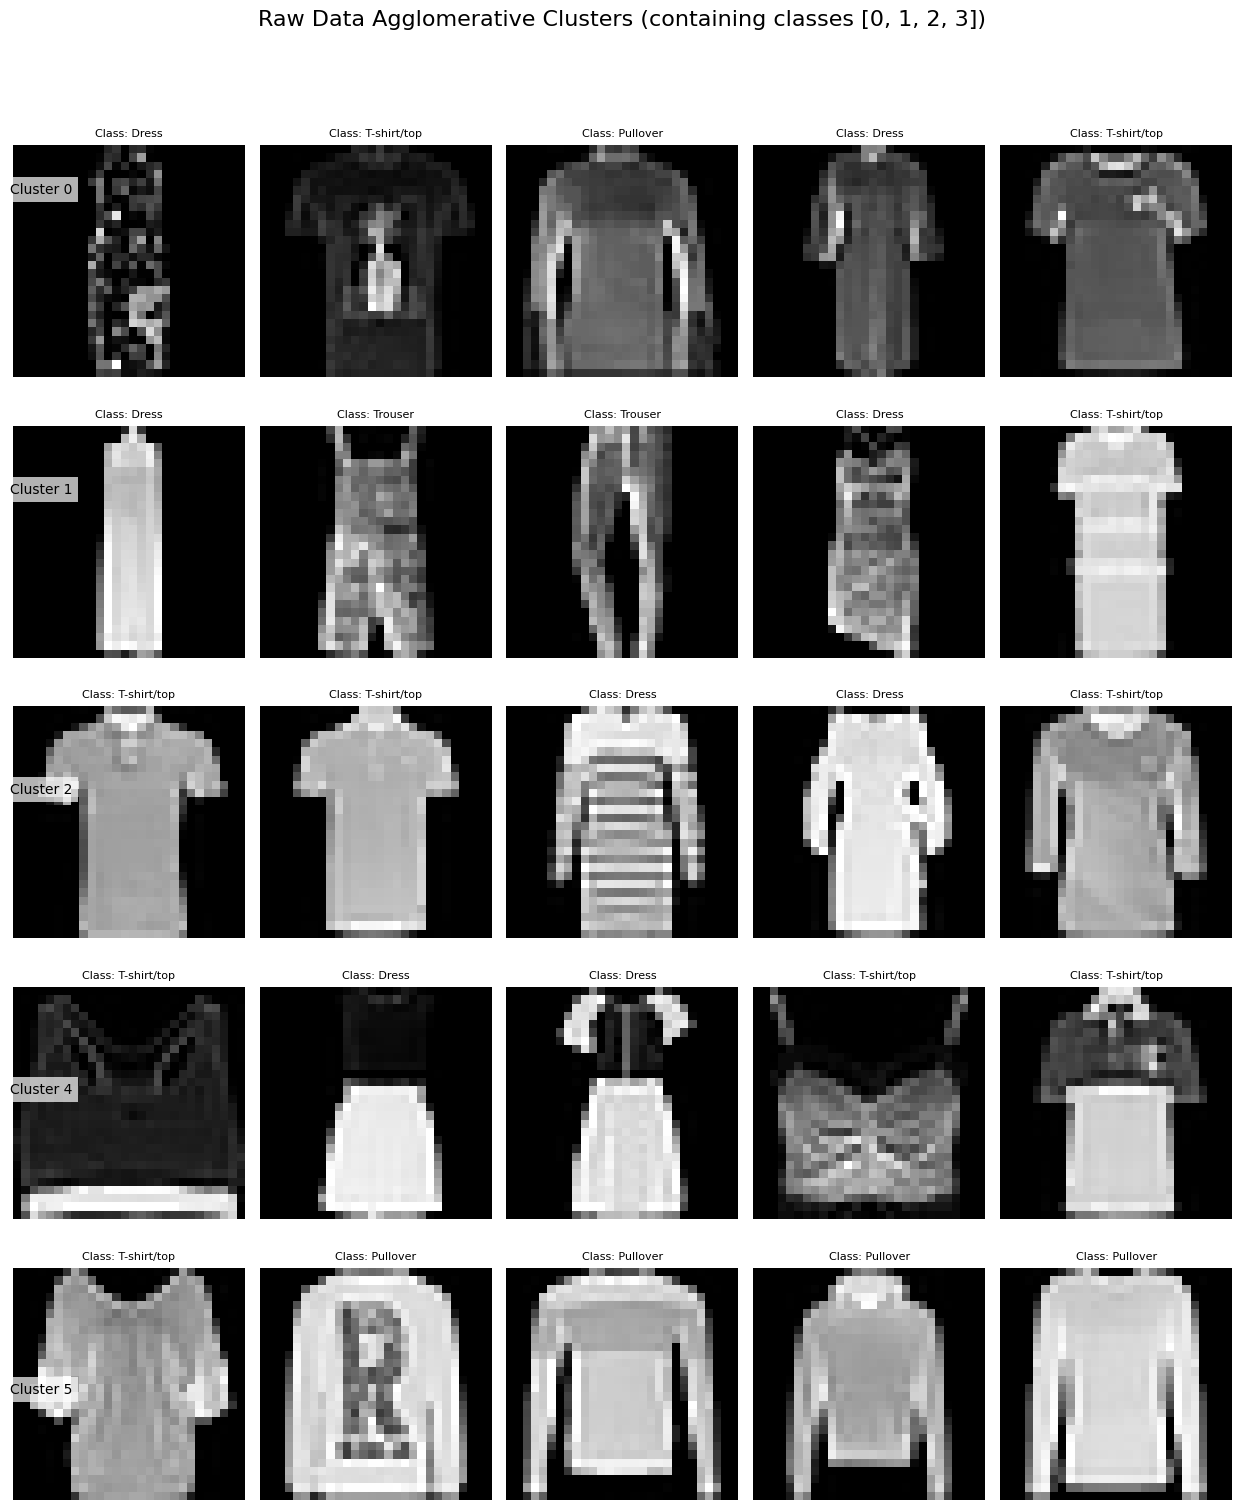


Generating Visualization for SAE Data Agglomerative Clusters...


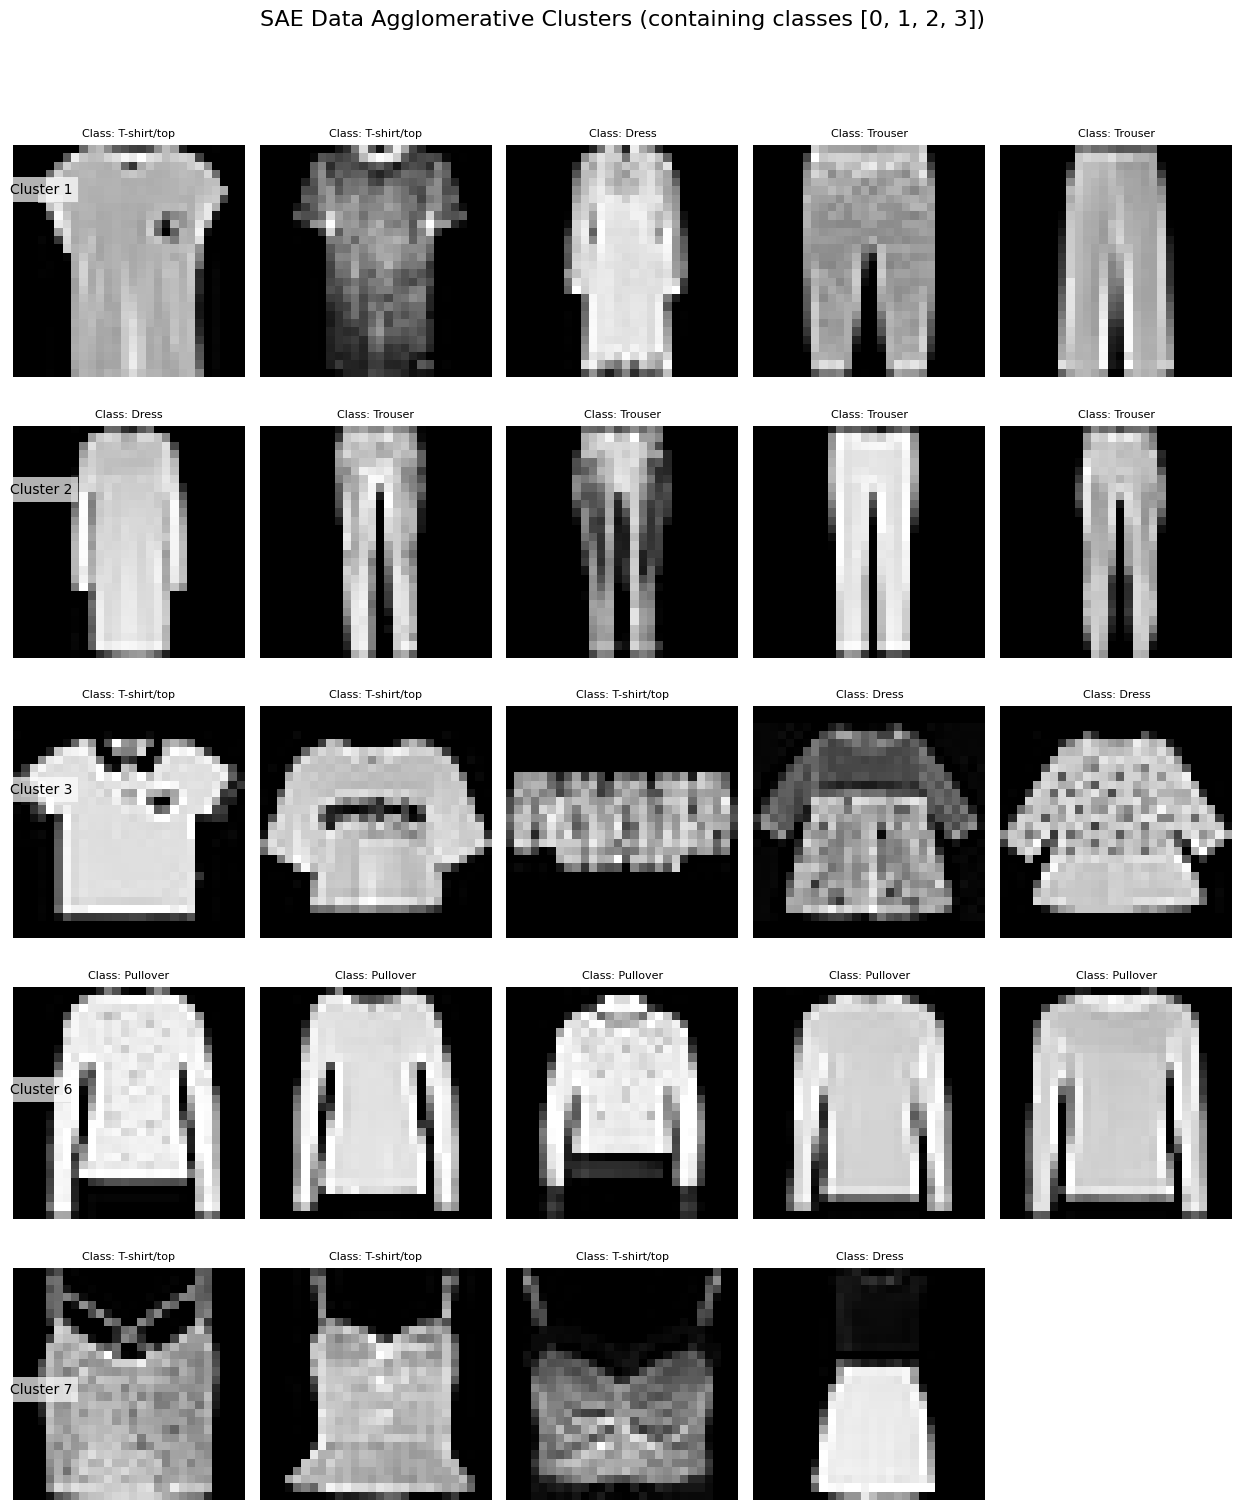

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for better readability in plots
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# User specified classes to focus on for visualization (e.g., T-shirt, Trouser, Pullover, Dress)
target_true_classes = [0, 1, 2, 3] # Corresponding to 'T-shirt/top', 'Trouser', 'Pullover', 'Dress'

num_images_per_cluster = 5

# --- Visualization 1: Raw Data Agglomerative Clusters ---
print("Generating Visualization for Raw Data Agglomerative Clusters...")

# Find Agglomerative clusters that contain images from the target_true_classes
relevant_agg_clusters_raw = set()
for true_class_id in target_true_classes:
    # Find indices in the original test data where true label matches target_true_class
    indices_of_true_class = np.where(y_test == true_class_id)[0]
    # Add the Agglomerative labels corresponding to these indices to the set of relevant clusters
    if len(indices_of_true_class) > 0:
        relevant_agg_clusters_raw.update(agg_labels_raw[indices_of_true_class])

# Convert to list and sort for consistent visualization
clusters_to_visualize_raw_agg = sorted(list(relevant_agg_clusters_raw))
# Limit to a reasonable number of clusters to display, e.g., first 5
clusters_to_visualize_raw_agg = clusters_to_visualize_raw_agg[:min(len(clusters_to_visualize_raw_agg), 5)]

if len(clusters_to_visualize_raw_agg) > 0:
    plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_raw_agg) * 3))
    plt.suptitle(f'Raw Data Agglomerative Clusters (containing classes {target_true_classes})', y=1.02, fontsize=16)

    for i, cluster_id in enumerate(clusters_to_visualize_raw_agg):
        # Find indices of images assigned to this cluster in the raw data
        indices_in_cluster = np.where(agg_labels_raw == cluster_id)[0]

        # Filter these indices further to include only images from the target_true_classes
        filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test[idx] in target_true_classes]

        if len(filtered_indices_by_true_class) == 0:
            print(f"Warning: Agglomerative Cluster {cluster_id} (Raw Data) has no images from specified true classes {target_true_classes}. Skipping visualization for this cluster.")
            for j in range(num_images_per_cluster):
                ax = plt.subplot(len(clusters_to_visualize_raw_agg), num_images_per_cluster, i * num_images_per_cluster + j + 1)
                ax.text(0.5, 0.5, 'No images from specified classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                ax.axis('off')
            continue

        selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

        for j, img_idx in enumerate(selected_indices):
            ax = plt.subplot(len(clusters_to_visualize_raw_agg), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            plt.imshow(x_test[img_idx], cmap='gray')
            plt.axis('off')
            ax.set_title(f"Class: {class_names[y_test[img_idx]]}", fontsize=8)

        plt.figtext(0.01, 1 - (i * 1.0 / len(clusters_to_visualize_raw_agg) + 0.5 / len(clusters_to_visualize_raw_agg)), f'Cluster {cluster_id}',
                    horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
else:
    print(f"No Agglomerative clusters found in Raw Data containing images from true classes {target_true_classes}.")


# --- Visualization 2: SAE Data Agglomerative Clusters ---
print("\nGenerating Visualization for SAE Data Agglomerative Clusters...")

relevant_agg_clusters_sae = set()
for true_class_id in target_true_classes:
    indices_of_true_class = np.where(y_test == true_class_id)[0]
    if len(indices_of_true_class) > 0:
        relevant_agg_clusters_sae.update(agg_labels_sae[indices_of_true_class])

clusters_to_visualize_sae_agg = sorted(list(relevant_agg_clusters_sae))
clusters_to_visualize_sae_agg = clusters_to_visualize_sae_agg[:min(len(clusters_to_visualize_sae_agg), 5)]

if len(clusters_to_visualize_sae_agg) > 0:
    plt.figure(figsize=(num_images_per_cluster * 2.5, len(clusters_to_visualize_sae_agg) * 3))
    plt.suptitle(f'SAE Data Agglomerative Clusters (containing classes {target_true_classes})', y=1.02, fontsize=16)

    for i, cluster_id in enumerate(clusters_to_visualize_sae_agg):
        indices_in_cluster = np.where(agg_labels_sae == cluster_id)[0]
        filtered_indices_by_true_class = [idx for idx in indices_in_cluster if y_test[idx] in target_true_classes]

        if len(filtered_indices_by_true_class) == 0:
            print(f"Warning: Agglomerative Cluster {cluster_id} (SAE Data) has no images from specified true classes {target_true_classes}. Skipping visualization for this cluster.")
            for j in range(num_images_per_cluster):
                ax = plt.subplot(len(clusters_to_visualize_sae_agg), num_images_per_cluster, i * num_images_per_cluster + j + 1)
                ax.text(0.5, 0.5, 'No images from specified classes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                ax.axis('off')
            continue

        selected_indices = np.random.choice(filtered_indices_by_true_class, min(num_images_per_cluster, len(filtered_indices_by_true_class)), replace=False)

        for j, img_idx in enumerate(selected_indices):
            ax = plt.subplot(len(clusters_to_visualize_sae_agg), num_images_per_cluster, i * num_images_per_cluster + j + 1)
            plt.imshow(x_test[img_idx], cmap='gray')
            plt.axis('off')
            ax.set_title(f"Class: {class_names[y_test[img_idx]]}", fontsize=8)

        plt.figtext(0.01, 1 - (i * 1.0 / len(clusters_to_visualize_sae_agg) + 0.5 / len(clusters_to_visualize_sae_agg)), f'Cluster {cluster_id}',
                    horizontalalignment='left', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
else:
    print(f"No Agglomerative clusters found in SAE Data containing images from true classes {target_true_classes}.")